In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from module.tf_idf import Converter

In [2]:
hdf_path = '/workspace/data/title/'
file_name = '押絵と旅する男_predicted.h5'

converter = Converter('押絵と旅する男')
df, lists = converter.main()

df = pd.read_hdf(hdf_path+file_name)
print(len(df))
# print(df.keys())
# print(type(df['contexsts_label'][0]))

301


In [3]:
kakko = ["「", "」"]
drop_short_index = [i for i,x in enumerate(df['japanese_texts']) if len(x) <= 15]
drop_kakko_index = [i for i,x in enumerate(df['japanese_texts']) if x[0] in kakko]

drop_index = drop_kakko_index + drop_short_index
drop_index = list(set(drop_index))

df = df.drop(drop_index)
print(df.keys())
df.head()
# df = df.reset_index(drop=True)
# print(len(df))
# print(df.keys())
# df.head()

Index(['japanese_texts', 'english_texts', 'contexsts_label', 'picture_label'], dtype='object')


,japanese_texts,english_texts,contexsts_label,picture_label
0,この話が私の夢か私の一時的狂気の幻でなかったならば、あの押絵と旅をしていた男こそ狂人であった...,If this story was not a dream of mine or an il...,1,0
1,だが、夢が時として、どこかこの世界と喰違った別の世界を、チラリと覗かせてくれる様に、又狂人が...,But just as dreams sometimes give us a glimpse...,1,1
2,いつとも知れぬ、ある暖かい薄曇った日のことである。,"It was a warm, lightly cloudy day, at any time...",1,1
3,その時、私は態々魚津へ蜃気楼を見に出掛けた帰り途であった。,"At the time, I was on my way back from a trip ...",1,1
4,私がこの話をすると、時々、お前は魚津なんかへ行ったことはないじゃないかと、親しい友達に突っ込...,"When I tell this story, close friends sometime...",0,0


In [4]:
extract_df = df.query('contexsts_label=="1" & picture_label=="1"')
extract_df = extract_df.reset_index(drop=True)
# print(len(extract_df))

index = []
for i in range(len(extract_df)):
    for item in lists:
        # 入ってる
        if item in extract_df['japanese_texts'][i]:
            index.append(i)
            break
        
tfidf_df = extract_df.iloc[index]
tfidf_df = tfidf_df.reset_index(drop=True)
print(len(tfidf_df))
display(tfidf_df.head())

23


,japanese_texts,english_texts,contexsts_label,picture_label
0,夢の中の景色は、映画と同じに、全く色彩を伴わぬものであるのに、あの折の汽車の中の景色丈けは、...,"The scenery in the dream, like in the film, is...",1,1
1,曖昧な形の、真黒な巨大な三角形が、塔の様に積重なって行ったり、またたく間にくずれたり、横に延...,"Huge, black triangles of ambiguous shapes pile...",1,1
2,蜃気楼の魔力が、人間を気違いにするものであったなら、恐らく私は、少くとも帰り途の汽車の中まで...,If the mirage's magic was to make people go ma...,1,1
3,二時間の余も立ち尽して、大空の妖異を眺めていた私は、その夕方魚津を立って、汽車の中に一夜を過...,I stood there for more than two hours gazing a...,1,1
4,魚津の駅から上野への汽車に乗ったのは、夕方の六時頃であった。,It was around six in the evening when I boarde...,1,1


In [5]:
text = tfidf_df['english_texts'][0]
text = tfidf_df['english_texts'].tolist()
# print(text[1])
print(len(text))

23


In [6]:
from module.image_create import Image_create

total base parameters 385030726
total upsampler parameters 398361286


In [7]:
# text_index = index[:2]
# en_text_list = tfidf_df['english_texts'].tolist()[:]
# jp_text_list = tfidf_df['japanese_texts'].tolist()[:]
# print(en_text_list)
# print(jp_text_list)

 that The scenery in the dream, like in the film, is completely colourless, but the scenery in the train on that occasion, centred on that poisonous oshie screen, is vividly etched in my memory, like the pupil of a snake's eye, in the colours of purple and dark red.
image


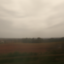

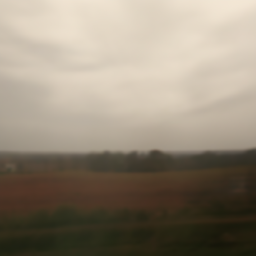

 that Huge, black triangles of ambiguous shapes piled up like towers, or fell apart in a flash, or ran sideways like a long train, or fell apart into several pieces and appeared to be treetops of standing cypress trees, or seemed to remain still, but at any moment transformed into a completely different shape.
image


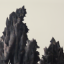

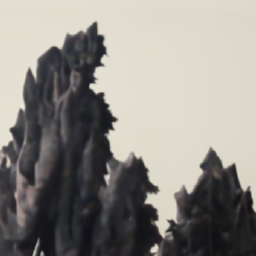

 that If the mirage's magic was to make people go mad, perhaps I would not have been able to escape its spell until at least the train on the way home.
image


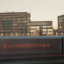

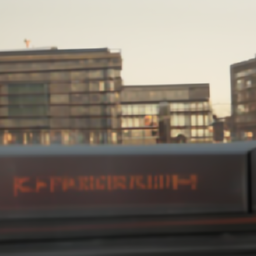

 that I stood there for more than two hours gazing at the wonders of the sky, and I am certain that I felt completely out of place until I left Uozu that evening and spent the night on the train.
image


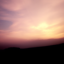

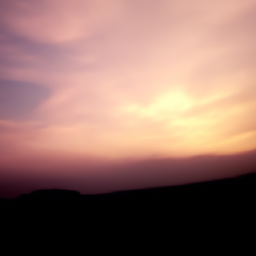

 that It was around six in the evening when I boarded the train from Uozu station to Ueno.
image


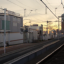

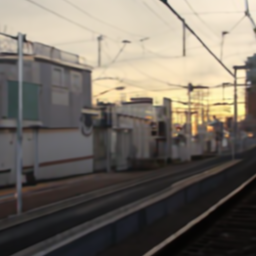

 that By a strange coincidence, or is this always the case with trains in that area, the second-class car I boarded was as deserted as a churchyard, with only one other passenger crouched on a cushion in the corner opposite me.


KeyboardInterrupt: 

In [8]:
"""画像生成"""
num = 1
title = "押絵と旅する男"
method = [""]
en_text_list = tfidf_df['english_texts'].tolist()[:]

for i, text in enumerate(en_text_list):
    directory = f'押絵と旅する男_{i}'
    image = Image_create(text, num, directory, method, title)
    image.Create()